In [2]:
%run mylib.ipynb
import math
import csv
import numpy as np
from matplotlib import pyplot as plt
import copy

# Aditya Prakash - 1911012

## ADITYA PRAKASH 
## ROLL NUMBER = 1911012

## Question 1

In [3]:
P = 5.95  # pressure
R = 0.0821  # Gas constant
a= 6.254  
T = 300        # temperature in kelvin
b =0.05422     

#Estimating guess for newton raphson using ideal gas

V_0 = (R*T)/P
#Solving equation to find volume V

func = lambda x: (P + a/x**2)*(x-b)-R*T
answer,q,r = newtonRaphson(func,V_0,10**(-5)) # My newton raphson retunrs 3 argument , first one is the root
print(f"Volume of the Real Gas is {answer} SI Units(m^3)")

# In newton raphson I have given an accuracy of 10**(-5) so that till 4th decimal place we get accurate

# Aditya Prakash - 1911012

Volume of the Real Gas is 3.9299487680181877 SI Units(m^3)


## Question 2

In [4]:
# Initializing Values
L = 4
d = 1.5
k = 1
l = 1
a = -l
b = 4-l

# Aditya Prakash - 1911012

# Initialising the integrand
f = lambda x: k*math.exp(-x**2/L**2)/math.sqrt(x**2+d**2)
# Calling Simpson for integral
ans = inte_simpson(f,a,b,12) # cAlling simpson with N =12
print(f"Value of the potential for N =12 due to the wire obtained from Simpson integration = {ans} units")

Value of the potential for N =12 due to the wire obtained from Simpson integration = 1.8728664575240428 units


## Question 3 (i)  $\sigma = \sigma_{o} *e^{\alpha *T}$

sigma_o = 0.4620483117887273 and alpha = -0.09716764829979363
Pearson's r = 0.9231412967039353


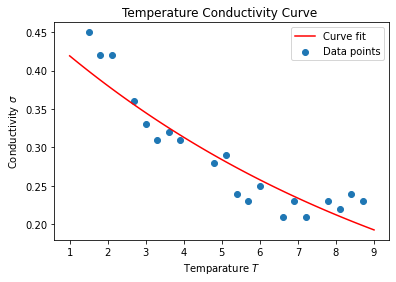

In [5]:
X,Y = get_from_csv('endsemdat1.csv')
for i in range(len(Y)):
    Y[i] = math.log(Y[i])

# Linear fit for the above datapoints with function log w(t) = log w_0 - w_c * t
fit_params = linear_fit(X, Y)

# Extract intercept log w_0 and slope -w_c
intercept, slope = fit_params[0], fit_params[1]
sigma_0 = math.exp(intercept)
alpha = slope
print("sigma_o = {} and alpha = {}".format(sigma_0, alpha))

# Quality of fit for above set of data points (Pearson's r)
quality = pearsons_r(X, Y)
print("Pearson's r =", quality)

# Reverting back to original set of yvals
for i in range(len(Y)):
    Y[i] = math.exp(Y[i])

# Plot the datapoints and fitted function
t = np.linspace(1, 9, 100)
sigma = sigma_0 * np.exp(alpha* t)
plt.plot(t, sigma, "r",label='Curve fit')
plt.scatter(X, Y, label='Data points')
plt.xlabel("Temparature $T$")
plt.ylabel("Conductivity $\sigma$")
plt.title("Temperature Conductivity Curve ")
plt.legend()
plt.show()


# Aditya Prakash - 1911012


## Question 3 (ii)  $\sigma = \sigma_{o} *T^{\alpha}$

sigma_0 =0.5455160765174941 and alpha =-0.43849688288816424
Pearsons number is 0.964482406736276


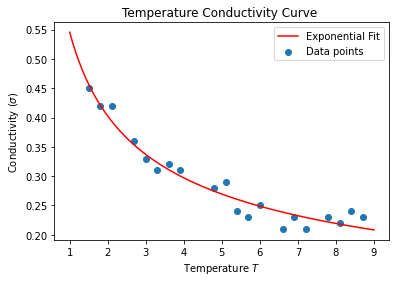

In [6]:
X2,Y2 = get_from_csv('endsemdat1.csv') # getting the data from csv file
for i in range(len(X2)):
    X2[i] = math.log(X2[i])  # taking log
    Y2[i] = math.log(Y2[i])    # taking log
intercept,slope= linear_fit(X2,Y2)
#print("Exponential")
sigma2_o = math.exp(intercept)
alpha2 = slope
print(f"sigma_0 ={sigma2_o} and alpha ={alpha2}")
r= pearsons_r(X2,Y2)
print(f"Pearsons number is {r}")

# Reverting back to original set of yvals
for i in range(len(Y2)):
    Y2[i] = math.exp(Y2[i])
    X2[i] = math.exp(X2[i])

# PLotting
# Plot the datapoints and fitted function
T = np.linspace(1, 9, 100)
Sigma = sigma2_o*T**alpha2
plt.plot(T, Sigma,'r', label='Exponential Fit')
plt.scatter(X2, Y2, label='Data points')
plt.xlabel("Temperature $T$")
plt.ylabel("Conductivity $(\sigma)$")
plt.title("Temperature Conductivity Curve ")
plt.legend()
plt.show()

# Aditya Prakash - 1911012


## Question 4

Coefficients of the fitted polynomial are
[5.7241062860246394, 2.31001829870581, -0.028162602079190243]

Pearson coefficient = 0.45899702157662214


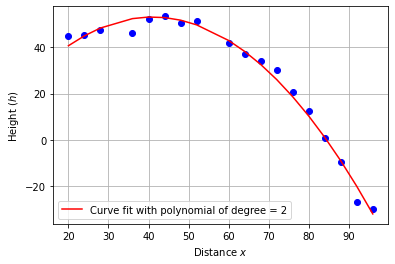

a_o =5.7241062860246394

a_1 =2.31001829870581

a_2 =-0.028162602079190243

So the equation is h = 5.7241062860246394 + 2.31001829870581*r  -0.028162602079190243*r^2 

After differentiating we get r_max = -a_1/(2*a_2)= 41.012160243756675 SI units (m)

Value of h at r max is h(r_max) = 53.09352660229106  SI units (m)
So the highest point reached by the missle is 53.09352660229106


In [7]:
file='endsemdat2.csv' # file name where data is store
x,y=get_from_csv(file)
degree=2  # setting qudratic degree

solution=polynomial_fitting(x,y,degree) # do polynomial fit


x,y=get_from_csv(file)
plt.plot(x, y,'bo')

plot_graph_poly(x,y, solution, degree+1)

print("Coefficients of the fitted polynomial are")
print(solution)

print("\nPearson coefficient = "+str(Pearson_coeff(x,y)))
plt.grid()
plt.xlabel('Distance $x$')
plt.ylabel('Height $(h)$')
plt.legend()
plt.show()

a_o =  5.7241062860246394
a_1 = 2.31001829870581
a_2 = -0.028162602079190243
print(f"a_o ={a_o}")
print()
print(f"a_1 ={a_1}")
print()
print(f"a_2 ={a_2}")
print()

# Aditya Prakash - 1911012
func = lambda x: a_o + a_1*x + a_2*x**2
print(f"So the equation is h = {a_o} + {a_1}*r  {a_2}*r^2 ")
print()
r_max = -a_1/(2*a_2)
print(f"After differentiating we get r_max = -a_1/(2*a_2)= {r_max} SI units (m)")
print()
print(f"Value of h at r max is h(r_max) = {func(r_max)}  SI units (m)")
print(f"So the highest point reached by the missle is {func(r_max)}")

In [9]:
print("We see that the determinant is non zero by")
  # Finding the coefficient matrix - refer notes
A=[[0 for j in range(order)] for i in range(order)]
vector=[0 for i in range(order)]

for i in range(order):
    for j in range(order):
        for k in range(len(X)):
            A[i][j] += X[k]**(i+j)

We see that the determinant is non zero by


NameError: name 'order' is not defined

## Question 5

Value of x  at T= 100 C  is 4.499999999999992 m

This was found using the solution arrays T and x 


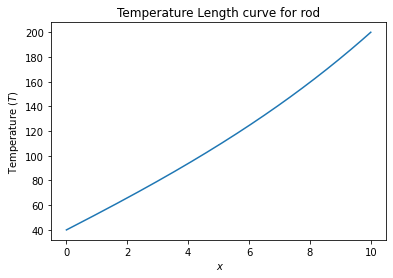

In [ ]:
def d2ydt2(t, y, z):   # function for double differentiaon of tempearture
    return -0.01*(20-y)
# z = dy/dt
def dydt(t, y, z):      
    return z

 #See my variable t denotes is x along the rod , y is temperature T, z is dT/dx 
  

# Aditya Prakash - 1911012
# Define boundary values
t_initial = 0
t_final = 10
y_initial = 40
y_final = 200
# i have taken guesses as 10 and 100
t, y, z = shooting_method(d2ydt2, dydt, t_initial, y_initial, t_final, y_final, 10, 100, step_size=0.05)
print(f"Value of x  at T= 100 C  is {t[90]} m")
print()
print("This was found using the solution arrays T and x ")
plt.plot(t,y)
plt.xlabel(" $x$")
plt.ylabel("Temperature $(T)$")
plt.title("Temperature Length curve for rod")

plt.show()

# Aditya Prakash - 1911012